In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
cd .

C:\Users\bgiza\desktop\UCFLM20190409DATA\Homework\05-Matplotlib\Instructions\Pyber


In [6]:
 cd data

C:\Users\bgiza\desktop\UCFLM20190409DATA\Homework\05-Matplotlib\Instructions\Pyber\data


In [47]:
# Read the City and Ride Data

# Setting the Data Frame

city_data=pd.read_csv("city_data.csv")
ride_data=pd.read_csv("ride_data.csv")

In [48]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
city            120 non-null object
driver_count    120 non-null int64
type            120 non-null object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [49]:
sum(city_data.duplicated(['city']))

0

In [50]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [51]:
city_ride = pd.merge(ride_data, city_data, on='city')

In [52]:
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [53]:
city_group=city_ride.groupby(['city','type'])
avg_city_fare=city_group['fare'].mean()
driver_city=city_group['driver_count'].sum()
ride_city=city_group['ride_id'].count()
city_type=city_ride[[ 'city', 'type']].drop_duplicates()


In [54]:
city_type = city_type.set_index('city')['type']

In [55]:
ride_summary=pd.DataFrame({'Average Fare':avg_city_fare,
             'Driver Count': driver_city,
             'Total Ride':ride_city,
            'Type_city' : city_type           
             })

In [56]:
ride_summary.reset_index(inplace= True)

In [57]:
ride_summary.head()



,level_0,level_1,Average Fare,Driver Count,Total Ride,Type_city
0,Amandaburgh,Urban,24.641667,216.0,18.0,NaN
1,Barajasview,Urban,25.332273,572.0,22.0,NaN
2,Barronchester,Suburban,36.422500,176.0,16.0,NaN
3,Bethanyland,Suburban,32.956111,396.0,18.0,NaN
4,Bradshawfurt,Rural,40.064000,70.0,10.0,NaN


In [58]:
ride_summary.rename(columns={'level_0':'city'}, inplace=True)

In [59]:
del(ride_summary['Type_city'])

In [60]:
ride_summary.rename(columns={'level_1':'city_type'}, inplace=True)

In [61]:
ride_summary.head()

,city,city_type,Average Fare,Driver Count,Total Ride
0,Amandaburgh,Urban,24.641667,216.0,18.0
1,Barajasview,Urban,25.332273,572.0,22.0
2,Barronchester,Suburban,36.422500,176.0,16.0
3,Bethanyland,Suburban,32.956111,396.0,18.0
4,Bradshawfurt,Rural,40.064000,70.0,10.0


In [63]:
urban=ride_summary[ride_summary['city_type']=='Urban']
sub_urban=ride_summary[ride_summary['city_type']=='Suburban']
rural=ride_summary[ride_summary['city_type']=='Rural']


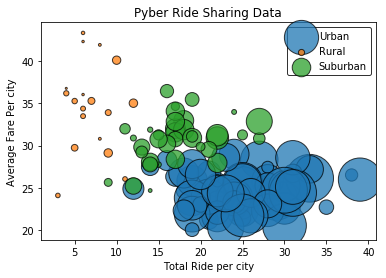

In [79]:
plt.scatter(data=urban, x='Total Ride', y='Average Fare', s = urban['Driver Count'], edgecolor = 'black', label = 'Urban', alpha = .75 )
plt.scatter(data=rural, x='Total Ride', y='Average Fare', s = rural['Driver Count'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(data=sub_urban, x='Total Ride', y='Average Fare', s = sub_urban['Driver Count'], edgecolor = 'black', label = 'Suburban', alpha = .75) 
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Ride per city")
plt.ylabel("Average Fare Per city")
plt.legend(frameon = True, edgecolor = 'black')
plt.show()

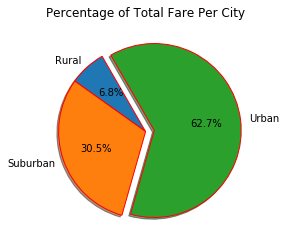

In [104]:
type_group=city_ride.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
total_fare_city=type_group.sum()['fare']
labels=total_fare_city.index
plt.pie(total_fare_city, explode = [0 , 0, .1], startangle = 120, labels=labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'red'})  

plt.title("Percentage of Total Fare Per City")
plt.show()  


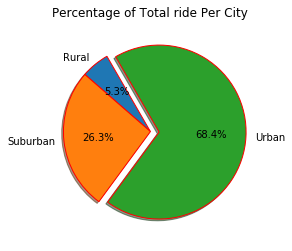

In [112]:
total_ride_city=type_group.count()['ride_id']
lables=total_ride_city.index
plt.pie(total_ride_city, explode = [0 , 0, .1], startangle = 120, labels=labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'red'})  

plt.title("Percentage of Total ride Per City")
plt.show() 

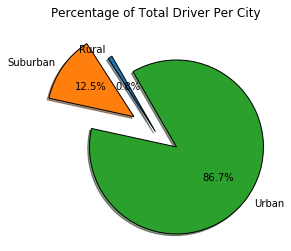

In [117]:
total_drive_city=type_group.sum()['driver_count']
lables=total_drive_city.index
plt.pie(total_drive_city, explode = [0 , 0.3, .3], startangle = 120, labels=labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': 1, 'edgecolor': 'black'})  

plt.title("Percentage of Total Driver Per City")
plt.show()

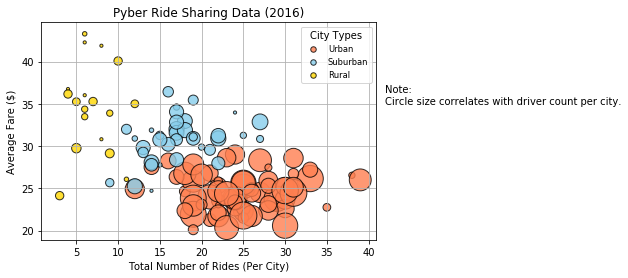

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure

urban_fare=urban['']

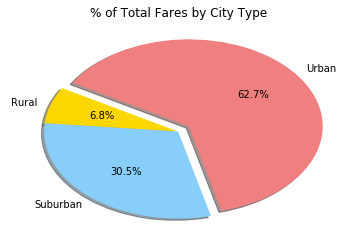

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


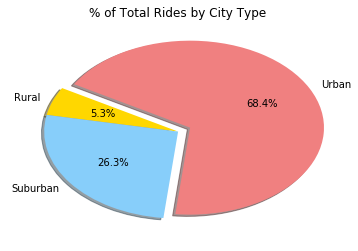

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


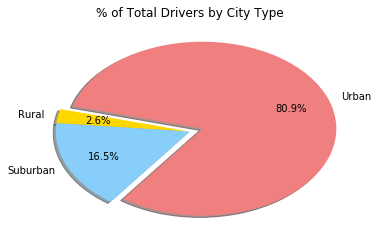

In [6]:
# Show Figure
plt.show()